In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 면허취득경과년수
- [가설] 면허취득년수'10년미만(5년이상 10년미만)'운전자들의 사고건수가 많았을 것이다.

    - 2018년부터 2022년까지 사고건수가 많은 운전자의 면허취득경과년수는 모든 해 동일하게 '15년 이상'의 운전자로 총 사고건수 1,056,368건 중 648,562건으로 약 61.4%이다. 
    - 취득경과년수가 10년미만인 운전자의 사고건수는 총 121,457건으로 전체의 약 11.5%로 15년이상 면허취득운전자가 약 5.3배 사고건수가 많음으로 해당 가설을 기각한다.

- 한계점 : 면허취득경과년수와 실운전년수가 동일함을 나타내는 데이터의 부재로 가설 결과를 확신할 수 없다. 운전자들의 실제 운전경력 데이터를 추가 분석하여 가설을 재검증한다.

In [2]:
license_g_y = pd.read_csv('license_g_y.csv', encoding='UTF-8')
license_g_y[:5]

,면허취득경과년수,사고년도,구분,구분값
0,1년미만,2018,사고건수[건],5301
1,1년미만,2018,사망자수[명],86
2,1년미만,2018,부상자수[명],7968
3,1년미만,2019,사고건수[건],5566
4,1년미만,2019,사망자수[명],56


In [4]:
license_g_y.drop(license_g_y[license_g_y.면허취득경과년수 == '합계'].index, inplace=True)

# 합계 행삭제 후, 인덱스 재정리
license_g_y.reset_index(drop=True, inplace=True)

In [5]:
license_g_y['사고건수'] = license_g_y[license_g_y.구분 == '사고건수[건]'].구분값
license_g_y['사망자수'] = license_g_y[license_g_y.구분 == '사망자수[명]'].구분값
license_g_y['부상자수'] = license_g_y[license_g_y.구분 == '부상자수[명]'].구분값

In [6]:
license_g_y.drop(columns=['구분', '구분값'], inplace=True)

<Axes: >

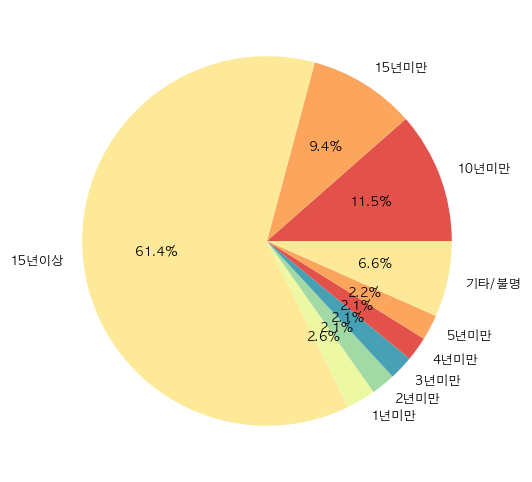

In [7]:
plt.figure(figsize=(6, 6))
plt.rc('font', size=9)
# plt.rcParams['font.family'] = 'D2coding'
plt.rcParams['font.family'] = 'AppleGothic'


license_g_y.groupby('면허취득경과년수').사고건수.sum().plot(kind='pie', 
                                                autopct='%.1f%%', 
                                                ylabel='',
                                                startangle=0, 
                                                colors=sns.color_palette('Spectral'),
                                               )

In [8]:
license_g_y.fillna(0)

,면허취득경과년수,사고년도,사고건수,사망자수,부상자수
0,1년미만,2018,5301.0,0.0,0.0
1,1년미만,2018,0.0,86.0,0.0
2,1년미만,2018,0.0,0.0,7968.0
3,1년미만,2019,5566.0,0.0,0.0
4,1년미만,2019,0.0,56.0,0.0
...,...,...,...,...,...
130,기타/불명,2021,0.0,265.0,0.0
131,기타/불명,2021,0.0,0.0,16468.0
132,기타/불명,2022,13760.0,0.0,0.0
133,기타/불명,2022,0.0,289.0,0.0


Text(0.5, 1.0, '면허취득경과년수에 따른 사고건수 비율')

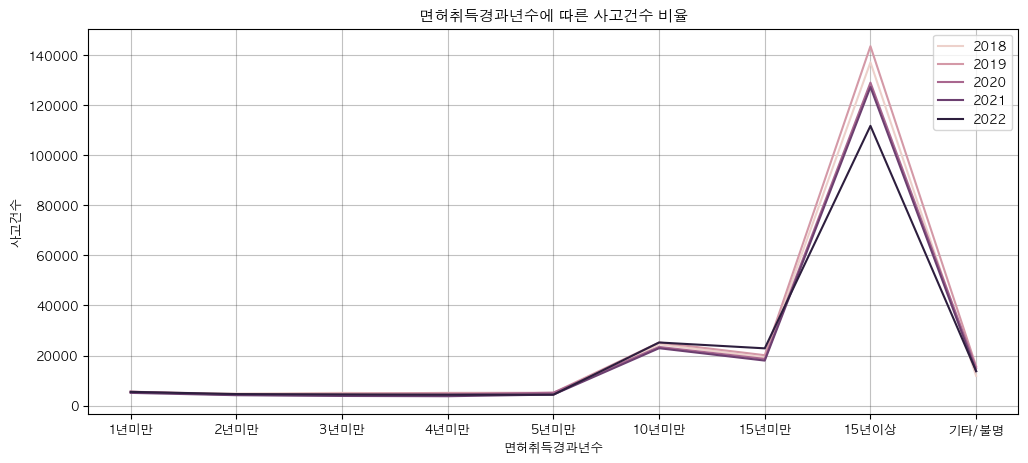

In [9]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=license_g_y, 
             x='면허취득경과년수', 
             y='사고건수', 
             hue='사고년도',
)

plt.grid(True,
         color='#333',
         alpha=0.3,
        )

plt.legend(
    title='',
    loc='upper right'
)

plt.title('면허취득경과년수에 따른 사고건수 비율')

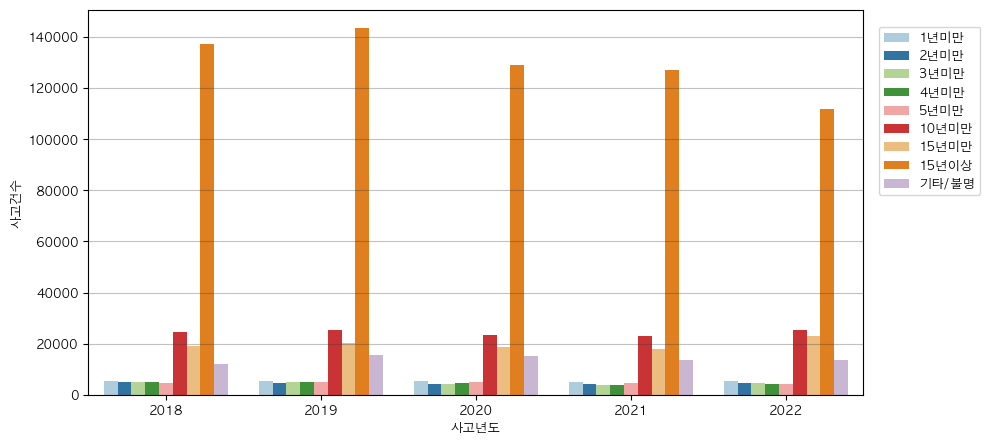

In [10]:
sns.barplot(
    data=license_g_y, 
    x='사고년도',
    y='사고건수',
    hue='면허취득경과년수',
    palette='Paired',
    errorbar=None,
).figure.set_size_inches(10, 5)

plt.grid(True,
         axis='y',
         color='#333',
         alpha=0.3,
        )
         
plt.legend(
    loc=(1.02, 0.52),
)

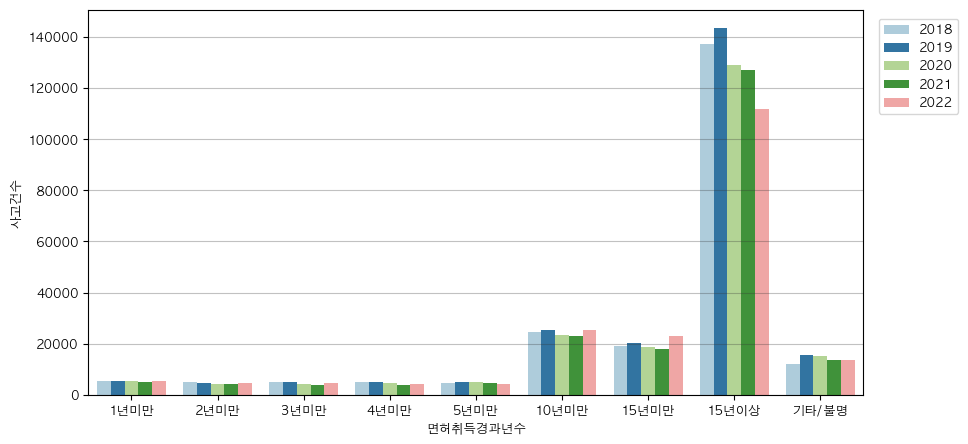

In [12]:
sns.barplot(
    data=license_g_y, 
    x='면허취득경과년수',
    y='사고건수',
    hue='사고년도',
    palette='Paired',
    errorbar=None,
).figure.set_size_inches(10, 5)

plt.grid(True,
         axis='y',
         color='#333',
         alpha=0.3,
        )
         
plt.legend(
    loc=(1.02, 0.73),
)

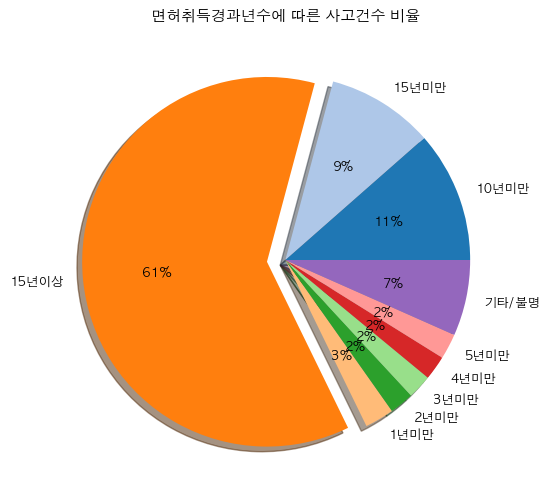

In [13]:
# 파이 차트 생성
plt.figure(figsize=(6, 6))
plt.rc('font', size=9)

pie_data = license_g_y.groupby('면허취득경과년수').사고건수.sum()

plt.pie(pie_data, 
        labels=pie_data.index, 
        autopct='%.f%%', 
        startangle=0, 
        colors=sns.color_palette('tab20'),
        explode=[0, 0, 0.1, 0, 0, 0, 0, 0, 0],
        shadow=True,
       )

plt.title('면허취득경과년수에 따른 사고건수 비율')

plt.show()


# 데이터 불러오기

## 연령별 사고유형
- [가설] 연령별 사고유형건수가 많은 것은 차대차일것이다.
    - 2018년부터 2022년까지 총 5년 동안 사고율이 높은 연령층은 51~60세로, 총 사고건수 1,056,368건 중 251,385건으로 약 23.8%이다.
    - 사고 유형이 가장 많은 사고는 차대차로, 총 사고건수 1,056,368건 중 811,587건이며 전체 사고 유형 건수의 약 76.8%이다. 차대차 사고 건수가 가장 많았던 해는 2019년이고, 사고건수는 229,600건으로 전체의 약 21.7%로 나타났다.

In [14]:
age_accident = pd.read_csv('age_accident.csv', encoding='UTF-8')
age_accident[:2]

,연령별,기준년도,사고유형,구분,구분값
0,20세이하,2018,차대사람,사고건수[건],1299
1,20세이하,2018,차대사람,사망자수[명],20


In [16]:
age_accident.rename(columns={'구분': '사고', '구분값': '사고건수'}, inplace=True)
age_accident[:2]

,연령별,기준년도,사고유형,사고,사고건수
0,20세이하,2018,차대사람,사고건수[건],1299
1,20세이하,2018,차대사람,사망자수[명],20


In [17]:
n_accident = age_accident[age_accident.사고 == '사고건수[건]']
n_accident[:5]

,연령별,기준년도,사고유형,사고,사고건수
0,20세이하,2018,차대사람,사고건수[건],1299
3,20세이하,2018,차대차,사고건수[건],4840
6,20세이하,2018,차량단독,사고건수[건],515
9,20세이하,2019,차대사람,사고건수[건],1406
12,20세이하,2019,차대차,사고건수[건],5257


<Axes: xlabel='기준년도'>

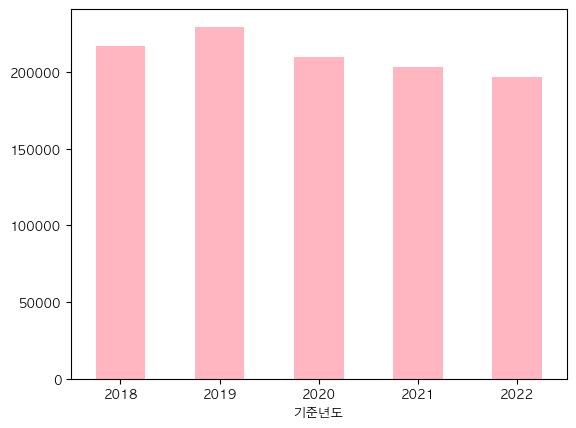

In [21]:
n_accident.groupby('기준년도').사고건수.sum().plot(kind='bar',
                                           rot=0,
                                           color='lightpink'
                                          )

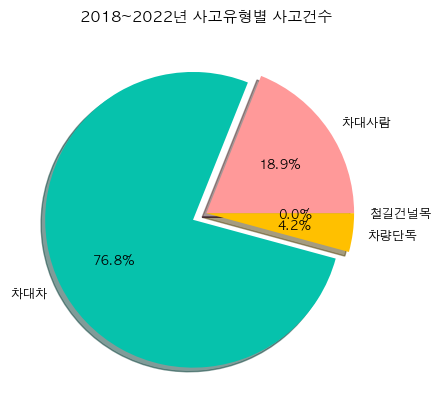

In [22]:
n_accident.groupby('사고유형').사고건수.sum().plot(kind='pie',
                                           autopct='%.1f%%', 
                                           colors=['#ff9999', '#06c2ac', '#ffc000', '#7e1e9c'],
                                           explode=[ 0, 0.1, 0, 0],
                                           shadow=True,
#                                            wedgeprops={'width': 0.8, 'edgecolor': 'k', 'linewidth': 1.5},
                                           label='',
                                           title='2018~2022년 사고유형별 사고건수',
                                        )

plt.show()

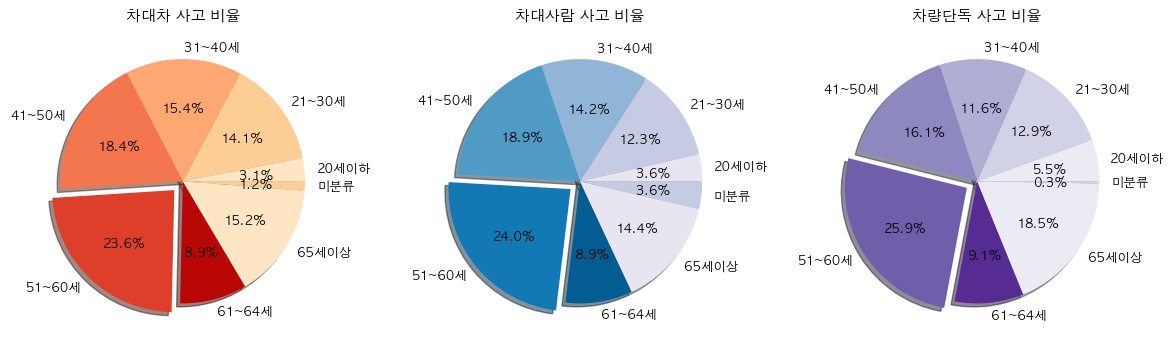

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터프레임 생성
g_a_c = n_accident.groupby(['사고유형', '연령별']).사고건수.sum().unstack()

# 그래프 설정
fig, ax = plt.subplots(1, 3, figsize=(12, 10))

g_a_c.loc['차대차'].plot(kind='pie', 
                      ax=ax[0], 
                      autopct='%.1f%%', 
                      colors=sns.color_palette('OrRd'),
                      explode=[0, 0, 0, 0, 0.1, 0, 0, 0],
                      shadow=True,
                      label='',
                     )

g_a_c.loc['차대사람'].plot(kind='pie',
                       ax=ax[1], 
                       autopct='%.1f%%',
                       colors=sns.color_palette('PuBu'), 
                       explode=[0, 0, 0, 0, 0.1, 0, 0, 0],
                       shadow=True,
                       label='',
                      )

g_a_c.loc['차량단독'].plot(kind='pie', 
                       ax=ax[2], 
                       autopct='%.1f%%', 
                       colors=sns.color_palette('Purples'), 
                       explode=[0, 0, 0, 0, 0.1, 0, 0, 0],
                       shadow=True,
                       label='',
                      )

ax[0].set_title('차대차 사고 비율')
ax[1].set_title('차대사람 사고 비율')
ax[2].set_title('차량단독 사고 비율')

plt.subplots_adjust(wspace=0.8)
plt.tight_layout()

# plt.show()
plt.savefig('사고유형별_연령층_사고건수.png', dpi=150) 

In [24]:
# 차대차사고 연도별 사고건수
g_car_and_car = n_accident[n_accident['사고유형'] == '차대차'].groupby(['기준년도', '사고유형'])['사고건수'].sum().unstack()

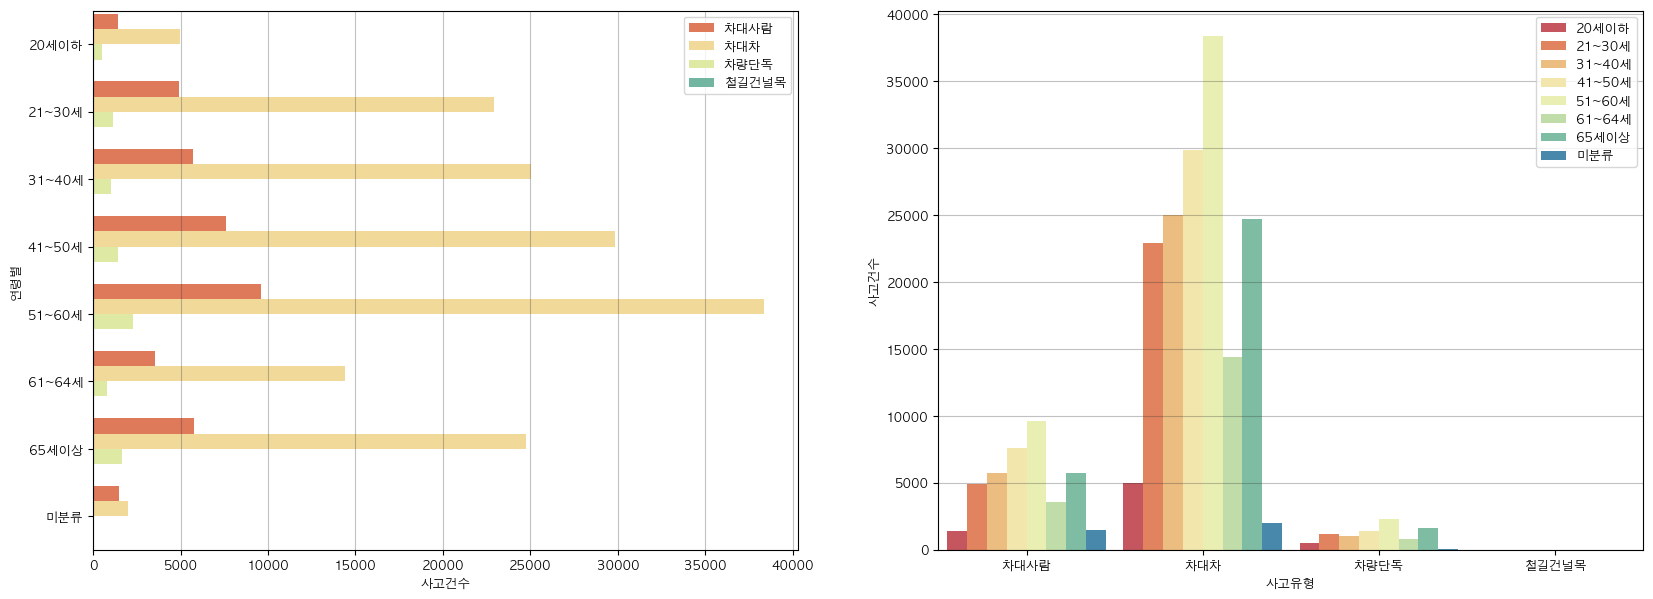

In [25]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(20, 7)

sns.barplot(
    data=n_accident,
    ax=ax[0],
    x='사고건수',
    y='연령별',
    hue='사고유형',
    errorbar=None,
    palette='Spectral',
    width=0.9
)
ax[0].legend(
    title='',
    loc='upper right'
)

ax[0].grid(True,
         axis='x',
         color='#333',
         alpha=0.3,
        )

sns.barplot(
    data=n_accident,
    ax=ax[1],
    x='사고유형',
    y='사고건수',
    hue='연령별',
    errorbar=None,
    palette='Spectral',
    width=0.9
)

ax[1].legend(
    title='',
    loc='upper right'
)

ax[1].grid(True,
           axis='y',
           color='#333',
           alpha=0.3,
          )

# plt.show()
plt.savefig('사고건수에 유형별 그래프.png', dpi=150)

# 교통법규위반
- [가설] 연도별 가장 많은 사고를 낸 교통법규위반은 '신호위반'일 것이며, 20~30대는 '과속'일 것이다.

- 2018년부터 2022년까지 연령별 교통법규위반 내용 중 가장 사고건수가 많았던 것은 '안전운전의무불이행'으로, 총 사고건수 1,056,368건 중 587,148건으로 전체 교통법규위반 중 약 55.6%로 나타났고, 신호위반은 두번째로 높은 교통법규위반으로 사고건수 124,616건이며 전체의 약 12.2%였다.

- 3315건의 '과속'은 21~30대 운전자들이 1009건으로 가장 많았으며, 31~40세 > 51~60세 > 41~50> 65세이상 > 20세이하 > 61~64세 순서로 나타났다.

- 한계점 : 사고건수별 연령대에 대한 가설은 연령별 차량소지자의 데이터를 추가하여 검증해야 결과의 신빙성이 높아질 수 있다.

In [26]:
age_v_low = pd.read_csv('age_v_low.csv', encoding='UTF-8')
age_v_low.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 657 entries, 0 to 656
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   연령별     657 non-null    object
 1   기준년도    657 non-null    int64 
 2   법규위반내용  657 non-null    object
 3   사고건수    657 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 20.7+ KB


In [27]:
age_v_low.sort_values(by='사고건수', ascending=False)[:5]

,연령별,기준년도,법규위반내용,사고건수
366,51~60세,2019,안전운전의무불이행,30000
348,51~60세,2018,안전운전의무불이행,29619
384,51~60세,2020,안전운전의무불이행,27664
400,51~60세,2021,안전운전의무불이행,25686
417,51~60세,2022,안전운전의무불이행,25123


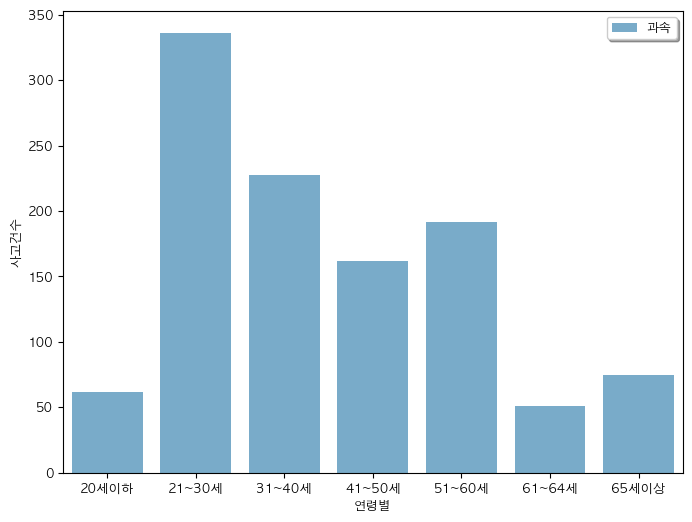

In [31]:
specific_l = age_v_low[age_v_low.법규위반내용 =='과속']

sns.barplot(data=specific_l,
            x='연령별',
            y='사고건수',
            hue='법규위반내용',
            errorbar=None,
            palette="Blues_r",
           ).figure.set_size_inches(8, 6)

plt.legend(ncols=2, shadow=True)
plt.savefig('연령별과속건수.png', dpi=150)

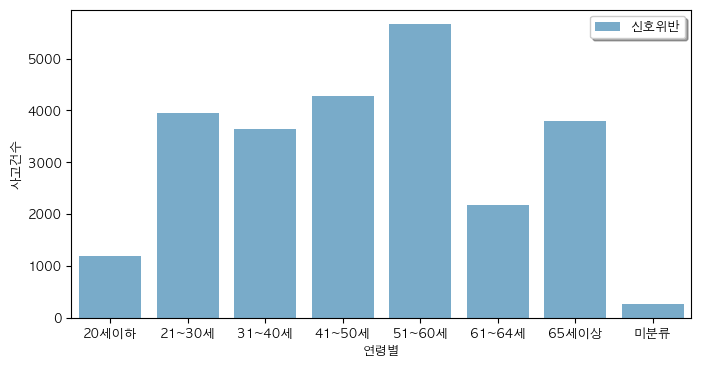

In [32]:
specific_l = age_v_low[age_v_low.법규위반내용 =='신호위반']

sns.barplot(data=specific_l,
            x='연령별',
            y='사고건수',
            hue='법규위반내용',
            errorbar=None,
            palette="Blues_r",
           ).figure.set_size_inches(8, 4)

plt.legend(ncols=2, shadow=True)
plt.savefig('연령별과속건수.png', dpi=150)

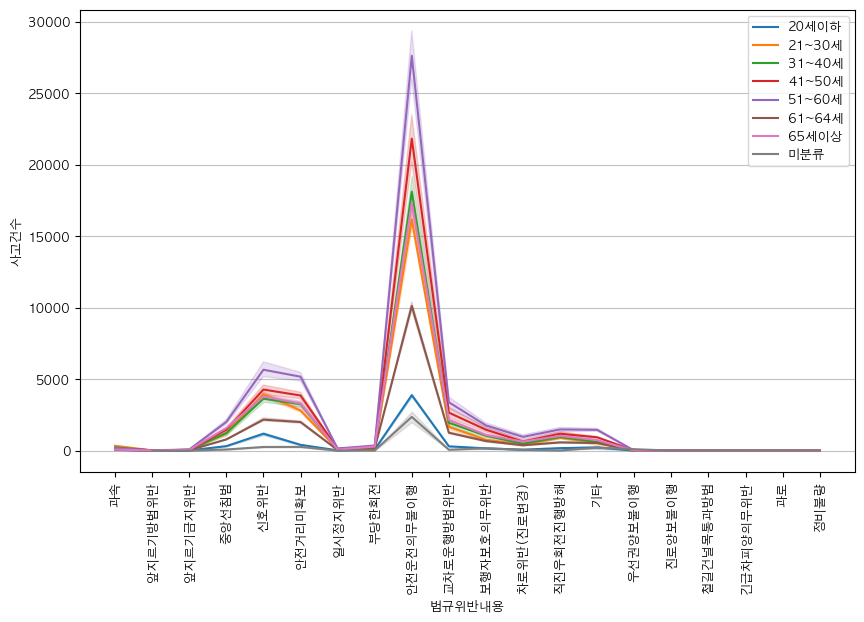

<Figure size 640x480 with 0 Axes>

In [34]:
plt.figure(figsize=(10, 6))

sns.lineplot(
    data=age_v_low,
    x='법규위반내용',
    y='사고건수',
    hue='연령별',
#     errorbar=None,
)

plt.legend(
    title='',
    loc='upper right'
)

plt.grid(True,
         axis='y',
         color='#333',
         alpha=0.3,
        )

plt.xticks(rotation='vertical')

plt.show()
plt.savefig('연도별법규위반비율.png', dpi=150)

In [35]:
a_number = age_v_low.sort_values(by='사고건수', ascending=False)
g_a_n = a_number.groupby('법규위반내용').사고건수.sum().sort_values(ascending=False)

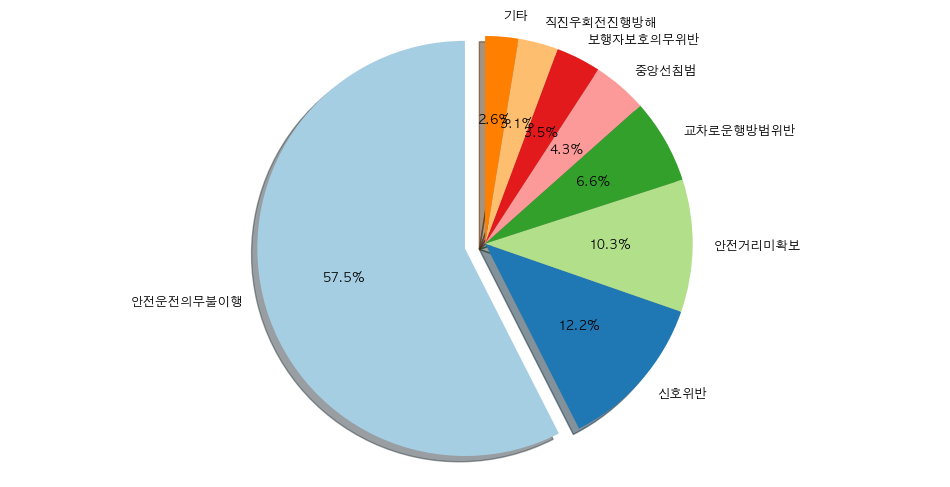

In [36]:
plt.figure(figsize=(12, 6))

plt.pie(g_a_n[:8], 
        labels=g_a_n.index[:8], 
        autopct='%.1f%%', 
        startangle=90, 
        colors=sns.color_palette('Paired'),
        explode=[0.1, 0, 0, 0, 0, 0, 0, 0],
        shadow=True,
       )

plt.axis('equal')

# 범례제거
plt.legend().remove()

# plt.show()
plt.savefig('법규위반비율.png', dpi=150)